In [1]:
!pip install scikit-learn pandas

In [2]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
from sklearn.preprocessing import OrdinalEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("/content/industrialcopper.csv")

In [4]:
for i in list(df.columns):
    print(f"{i}:{df[i].nunique()}")
    df.dtypes

id:159472
item_date:216
quantity tons:159474
customer:1133
country:17
status:9
item type:7
application:30
thickness:574
width:1368
material_ref:15651
product_ref:34
delivery date:28
selling_price:8827


In [5]:
df['quantity tons'] = pd.to_numeric(df['quantity tons'], errors='coerce')
df['item_date_1'] = pd.to_datetime(df['item_date'], format='%Y%m%d', errors='coerce').dt.date
df['delivery date_1'] = pd.to_datetime(df['delivery date'], format='%Y%m%d', errors='coerce').dt.date
df.head(3)
df.isnull().sum()

,0
id,2
item_date,1
quantity tons,0
customer,1
country,28
status,2
item type,0
application,24
thickness,1
width,0


In [6]:
df['material_ref'] = df['material_ref'].apply(lambda x: np.nan if str(x).startswith('00000') else x)
df.head(3)
df.isnull().sum()

,0
id,2
item_date,1
quantity tons,0
customer,1
country,28
status,2
item type,0
application,24
thickness,1
width,0


In [7]:
df.drop(columns=['id','material_ref'], inplace=True)
df
df.describe().T

,count,mean,std,min,25%,50%,75%,max
item_date,159473.0,2.020513e+07,4.607863e+03,19950000.00,2.020102e+07,2.020121e+07,2.021021e+07,2.021040e+07
quantity tons,159474.0,9.360333e+01,4.286280e+02,-4.00,1.051725e+01,2.994279e+01,6.615319e+01,7.025236e+04
customer,159473.0,3.055052e+07,2.597208e+07,12458.00,3.019688e+07,3.020519e+07,3.028008e+07,2.147484e+09
country,159446.0,4.517567e+01,2.460801e+01,25.00,2.600000e+01,3.000000e+01,7.800000e+01,1.130000e+02
application,159450.0,2.560687e+01,1.775331e+01,2.00,1.000000e+01,1.500000e+01,4.100000e+01,9.900000e+01
thickness,159473.0,2.542678e+00,6.923597e+00,0.18,7.000000e-01,1.500000e+00,3.000000e+00,2.500000e+03
width,159474.0,1.295431e+03,2.593598e+02,1.00,1.180000e+03,1.250000e+03,1.500000e+03,2.990000e+03
product_ref,159474.0,4.806684e+08,7.213740e+08,6404.00,6.119930e+05,6.406650e+05,1.665572e+09,1.722208e+09
delivery date,159472.0,2.020828e+07,2.560293e+04,20190401.00,2.021010e+07,2.021030e+07,2.021050e+07,3.031010e+07
selling_price,159472.0,2.096085e+03,3.541377e+05,-1160.00,7.010000e+02,8.340000e+02,9.700000e+02,1.000010e+08


In [8]:
df['quantity tons'] = df['quantity tons'].apply(lambda x: np.nan if x<=0 else x)
df['selling_price'] = df['selling_price'].apply(lambda x: np.nan if x<=0 else x)
df.describe().T
df.isnull().sum()

,0
item_date,1
quantity tons,2
customer,1
country,28
status,2
item type,0
application,24
thickness,1
width,0
product_ref,0


In [9]:
df['item_date'].fillna(df['item_date'].mode().iloc[0], inplace=True)
df['item_date_1'].fillna(df['item_date_1'].mode().iloc[0], inplace=True)
df['status'].fillna(df['status'].mode().iloc[0], inplace=True)
df['delivery date'].fillna(df['delivery date'].mode().iloc[0], inplace=True)
df['delivery date_1'].fillna(df['delivery date_1'].mode().iloc[0], inplace=True)

In [10]:
df['quantity tons'].fillna(df['quantity tons'].median(), inplace=True)
df['customer'].fillna(df['customer'].median(), inplace=True)
df['country'].fillna(df['country'].median(), inplace=True)
df['application'].fillna(df['application'].median(), inplace=True)
df['thickness'].fillna(df['thickness'].median(), inplace=True)
df['selling_price'].fillna(df['selling_price'].median(), inplace=True)

In [11]:
df.isnull().sum()
df['status'].unique()
df['item type'].unique()

array(['W', 'WI', 'S', 'Others', 'PL', 'IPL', 'SLAWR'], dtype=object)

In [12]:
df['status'] = df['status'].map({'Lost':0, 'Won':1, 'Draft':2, 'To be approved':3, 'Not lost for AM':4, 'Wonderful':5, 'Revised':6, 'Offered':7, 'Offerable':8})
df['item type'] = OrdinalEncoder().fit_transform(df[['item type']])

In [13]:
df['item type'].unique()
df.isnull().sum()
df.describe().T

,count,mean,std,min,25%,50%,75%,max
item_date,159474.0,2.020513e+07,4.607859e+03,1.995000e+07,2.020102e+07,2.020121e+07,2.021021e+07,2.021040e+07
quantity tons,159474.0,9.360374e+01,4.286279e+02,1.867763e-03,1.051751e+01,2.994312e+01,6.615319e+01,7.025236e+04
customer,159474.0,3.055052e+07,2.597199e+07,1.245800e+04,3.019688e+07,3.020519e+07,3.028008e+07,2.147484e+09
country,159474.0,4.517301e+01,2.460667e+01,2.500000e+01,2.600000e+01,3.000000e+01,7.800000e+01,1.130000e+02
status,159474.0,1.315751e+00,1.320078e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,8.000000e+00
item type,159474.0,4.159029e+00,1.054900e+00,0.000000e+00,3.000000e+00,5.000000e+00,5.000000e+00,6.000000e+00
application,159474.0,2.560528e+01,1.775245e+01,2.000000e+00,1.000000e+01,1.500000e+01,4.100000e+01,9.900000e+01
thickness,159474.0,2.542671e+00,6.923576e+00,1.800000e-01,7.000000e-01,1.500000e+00,3.000000e+00,2.500000e+03
width,159474.0,1.295431e+03,2.593598e+02,1.000000e+00,1.180000e+03,1.250000e+03,1.500000e+03,2.990000e+03
product_ref,159474.0,4.806684e+08,7.213740e+08,6.404000e+03,6.119930e+05,6.406650e+05,1.665572e+09,1.722208e+09


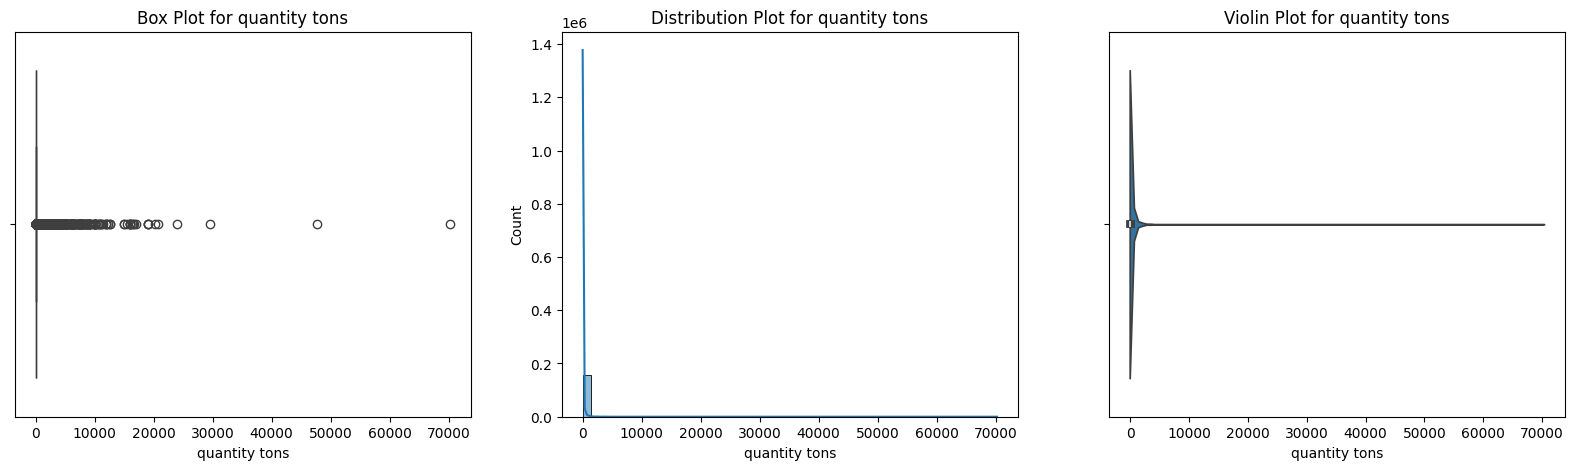

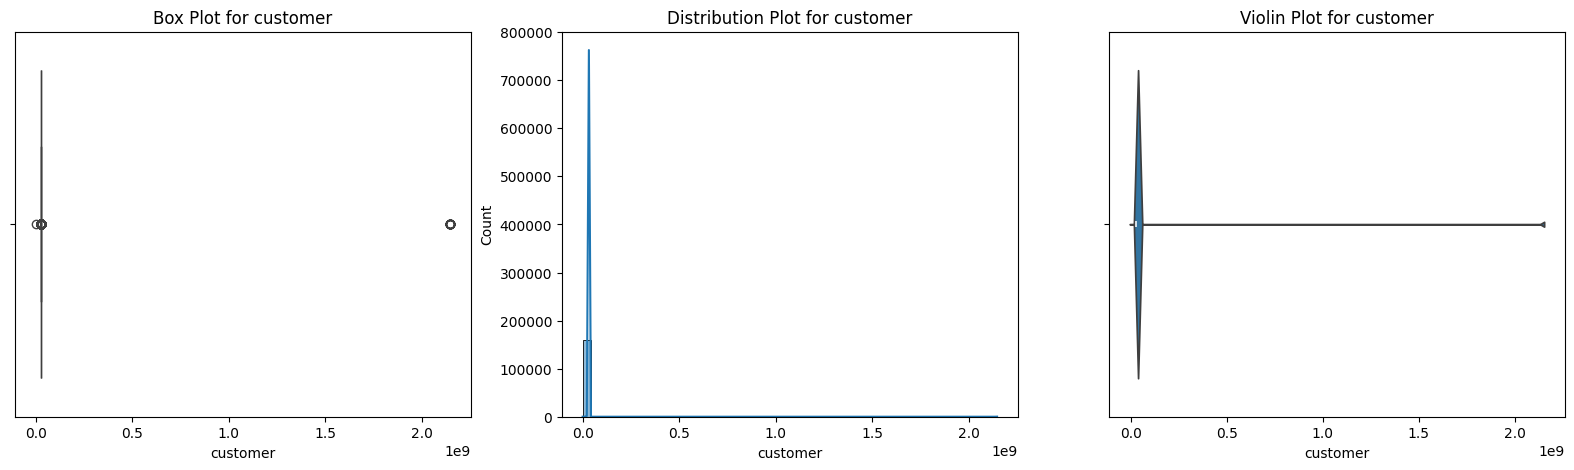

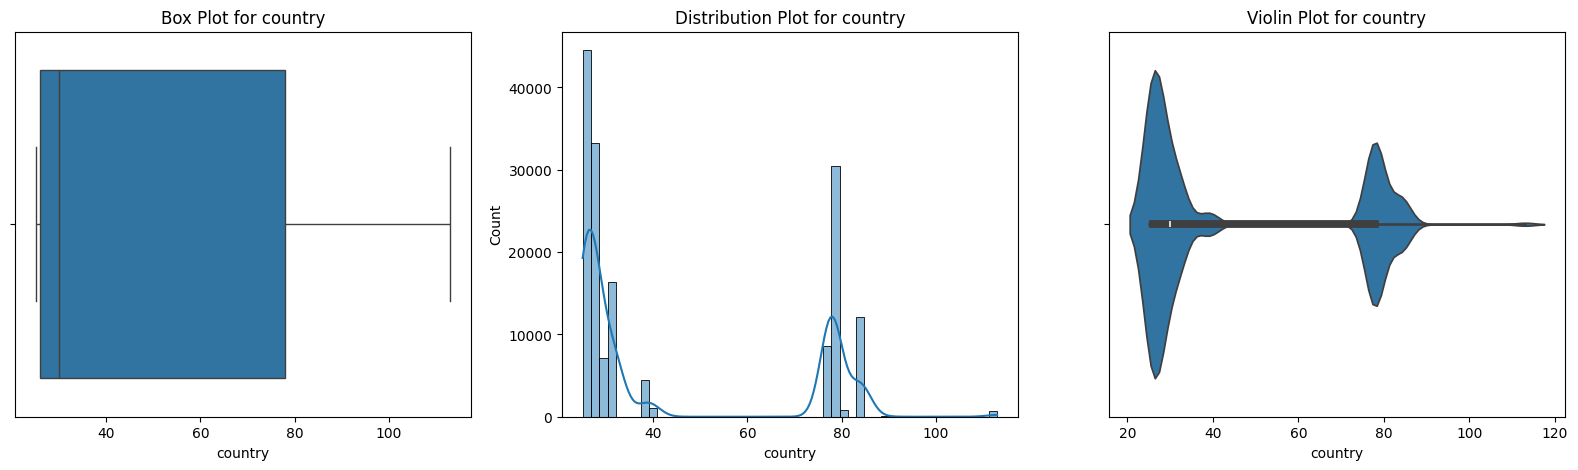

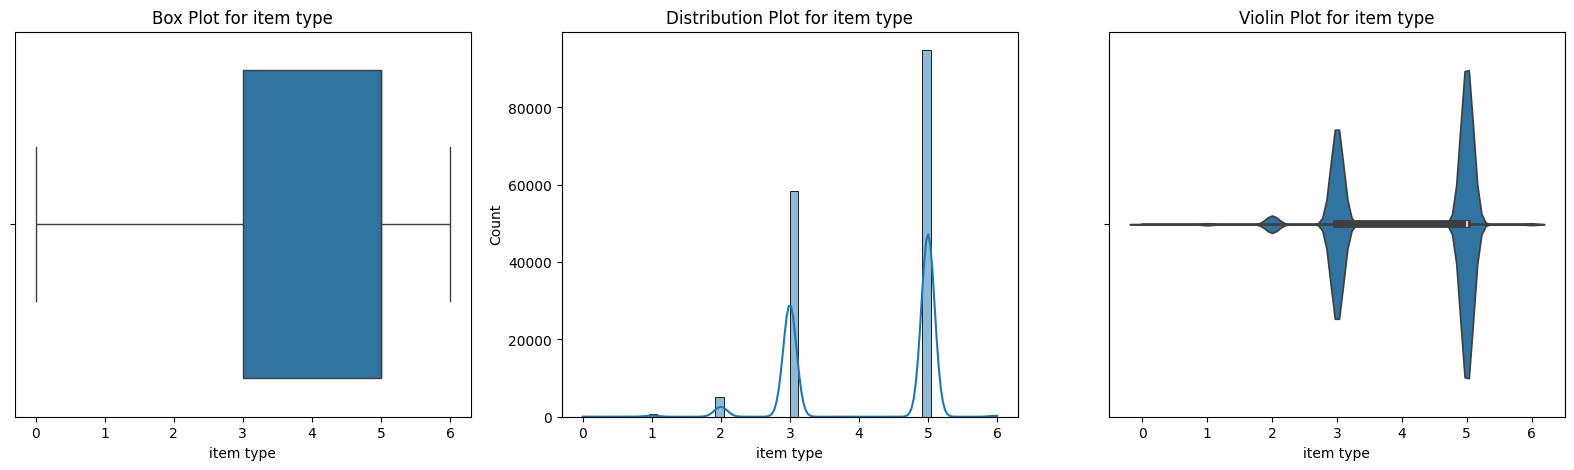

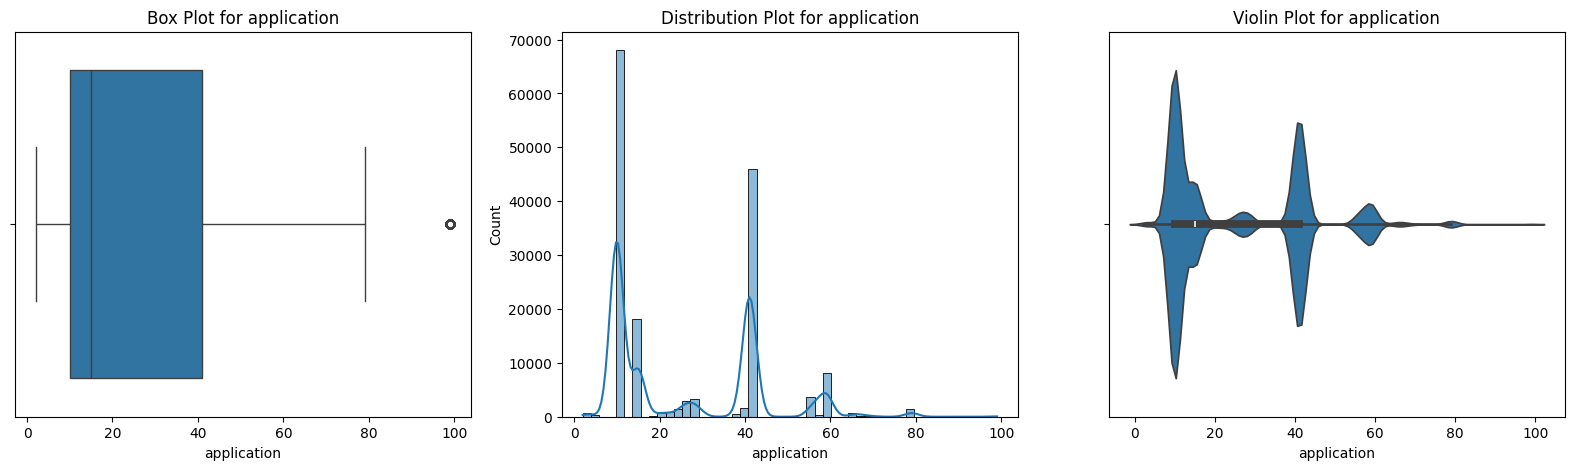

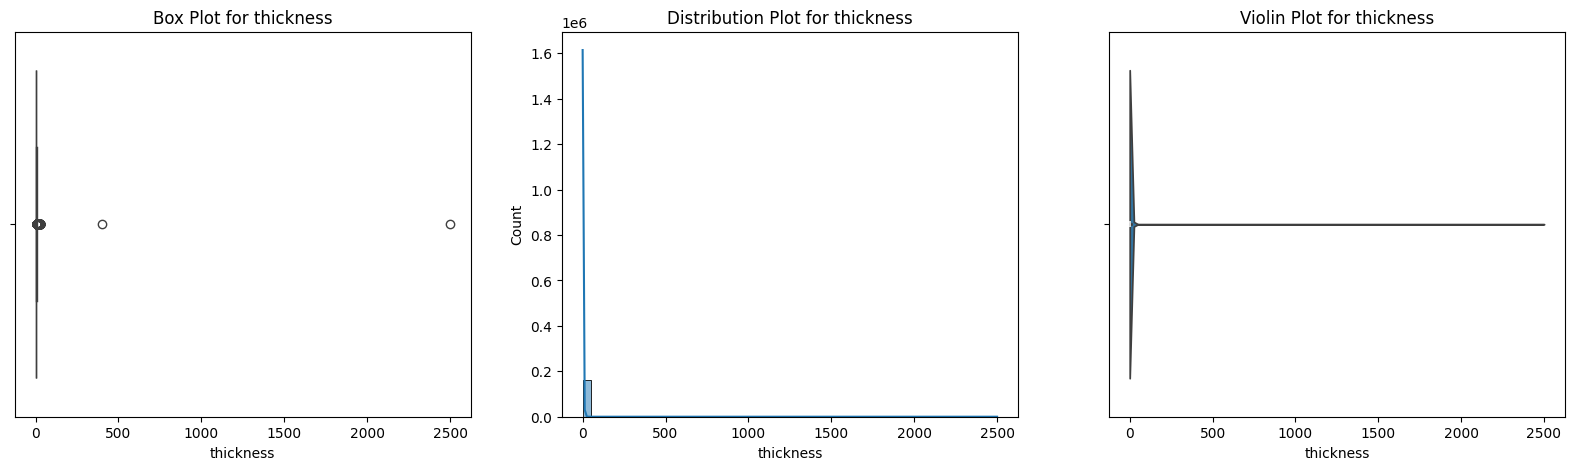

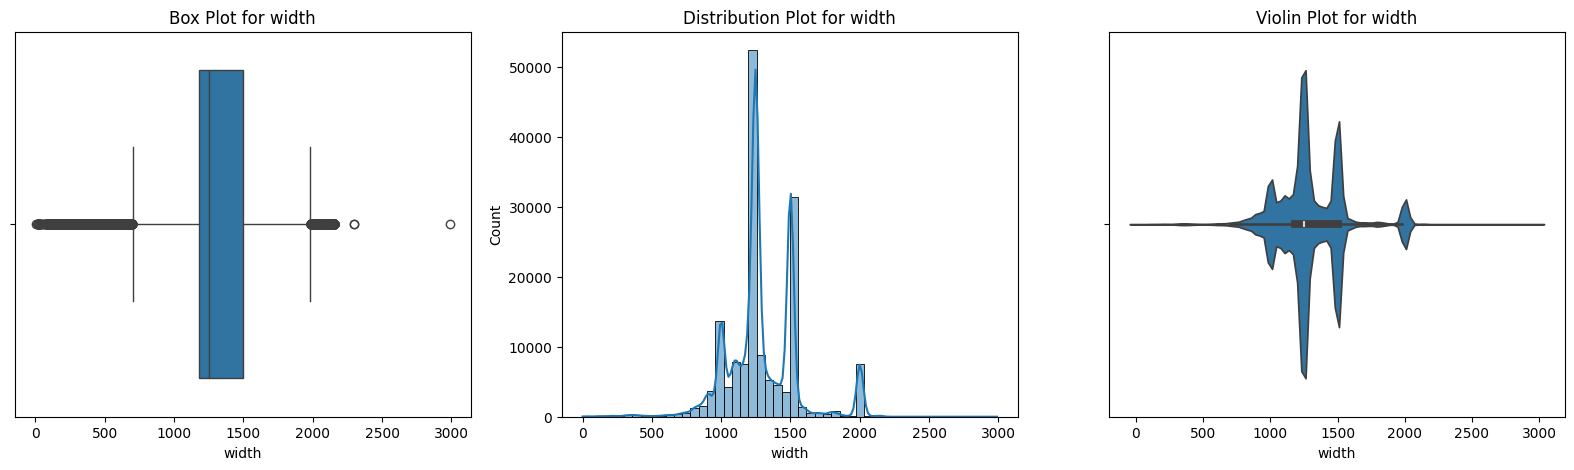

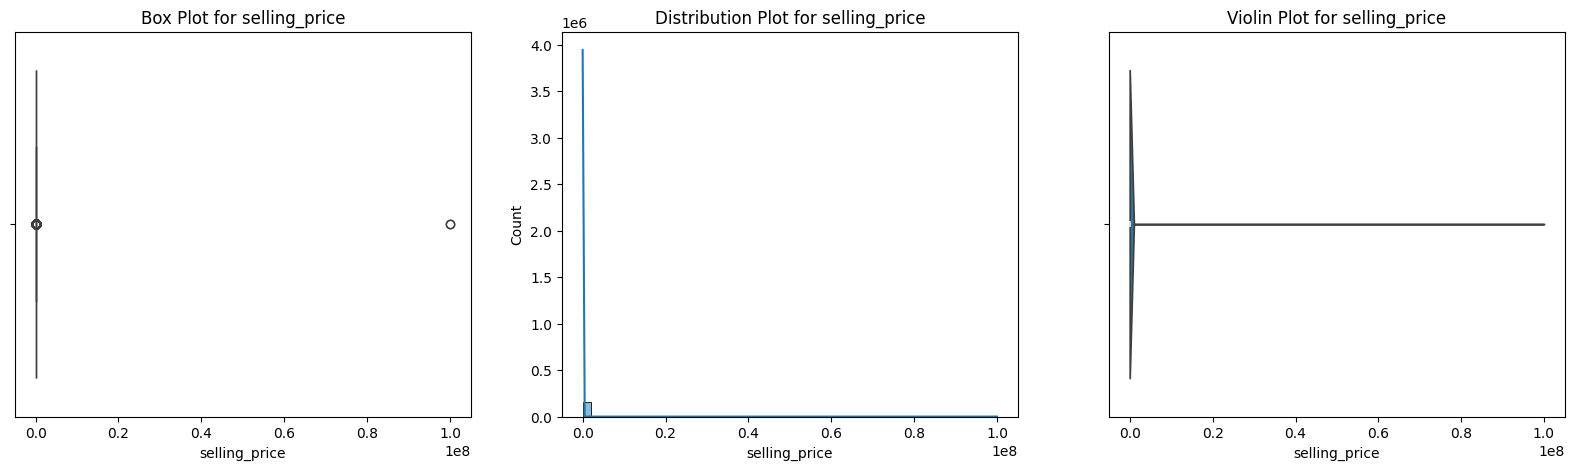

In [14]:
def plot(df, column):
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.boxplot(data=df, x=column)
    plt.title(f'Box Plot for {column}')

    plt.subplot(1,3,2)
    sns.histplot(data=df, x=column, kde=True, bins=50)
    plt.title(f'Distribution Plot for {column}')

    plt.subplot(1,3,3)
    sns.violinplot(data=df, x=column)
    plt.title(f'Violin Plot for {column}')
    plt.show()
for i in ['quantity tons', 'customer', 'country', 'item type', 'application', 'thickness', 'width', 'selling_price']:
    plot(df, i)

In [15]:
df1 = df.copy()
df1['quantity tons_log'] = np.log(df1['quantity tons'])
df1['thickness_log'] = np.log(df1['thickness'])
df1['selling_price_log'] = np.log(df1['selling_price'])


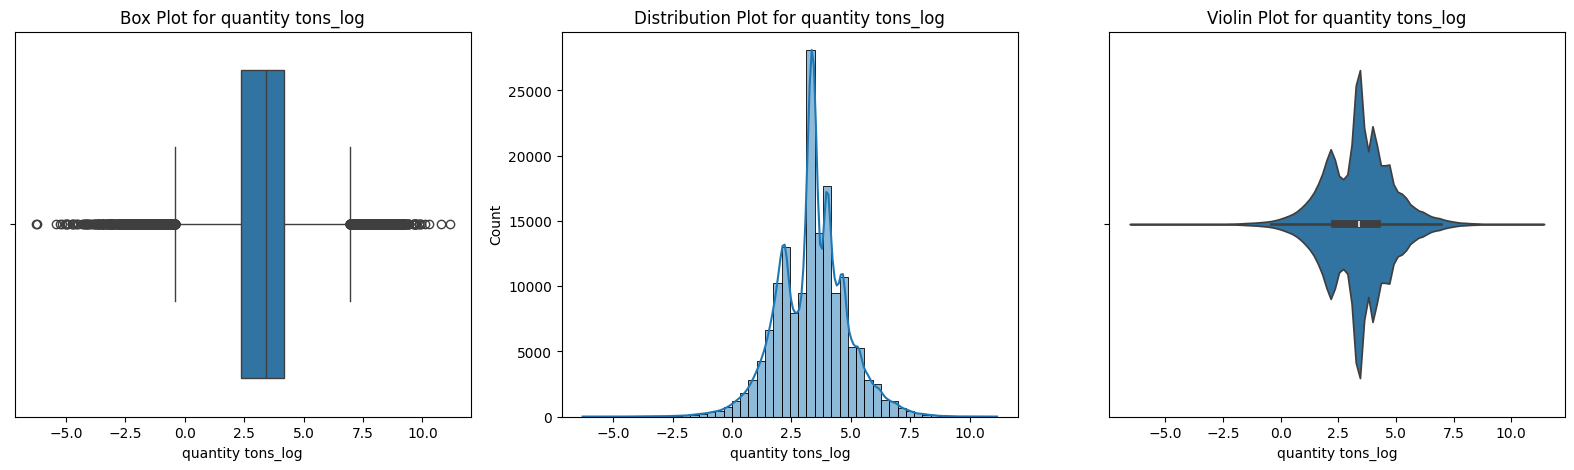

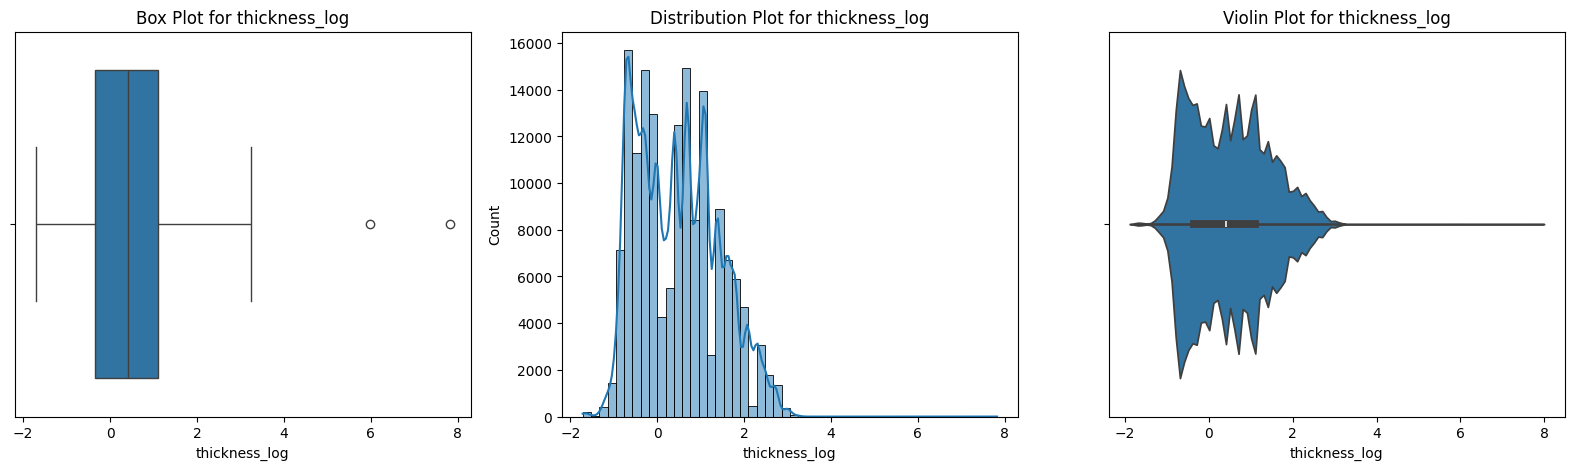

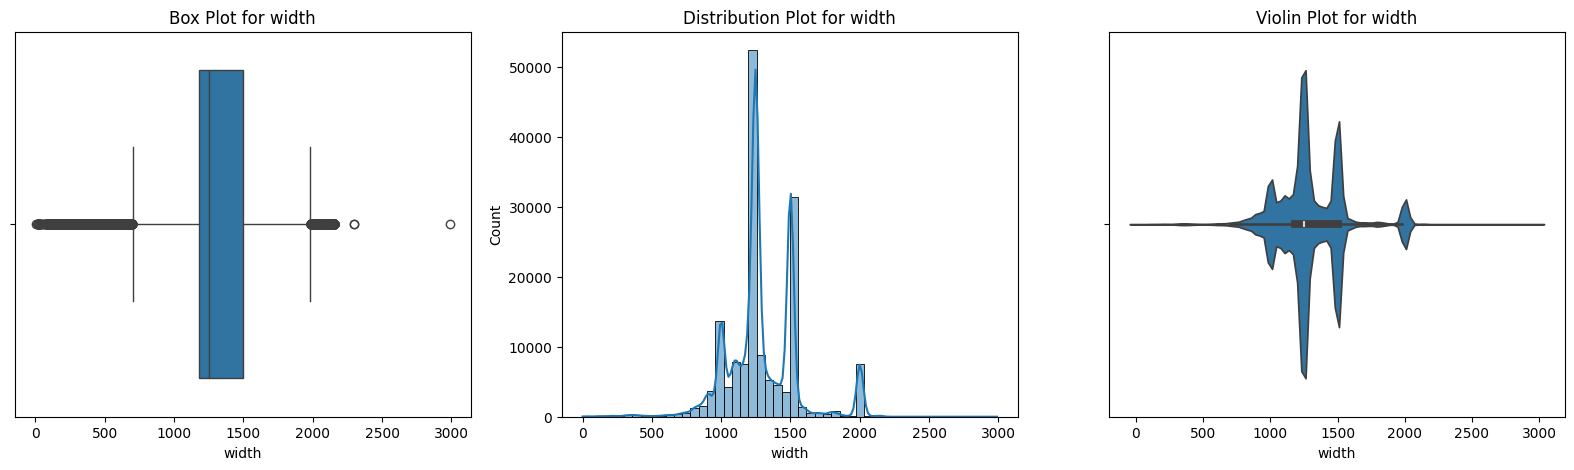

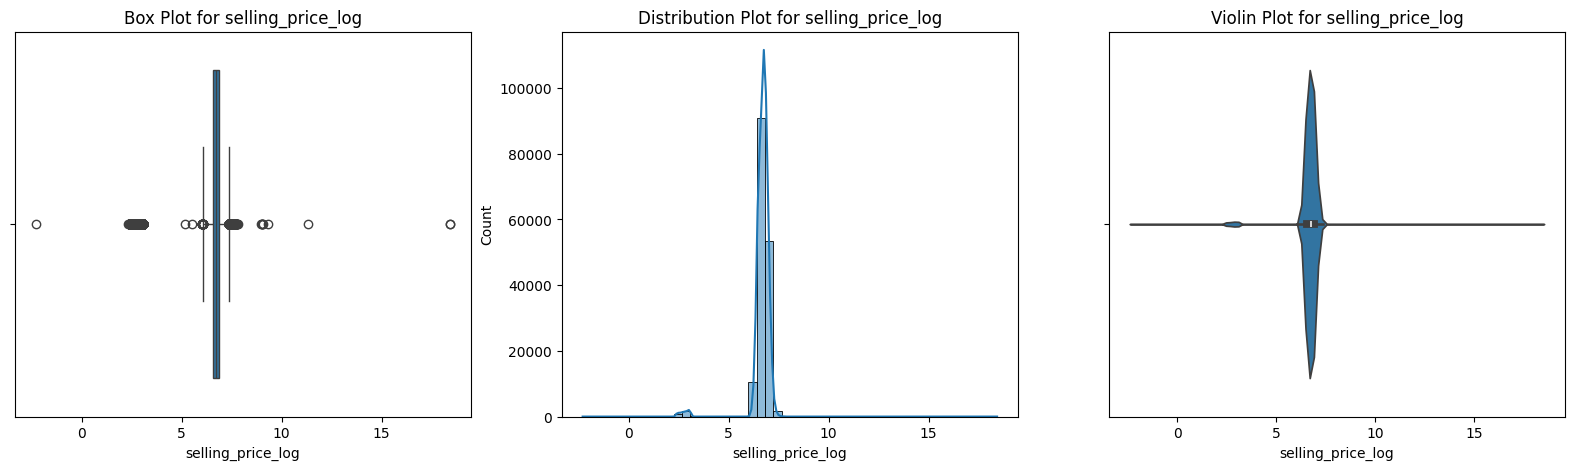

In [16]:
for i in ['quantity tons_log', 'thickness_log', 'width', 'selling_price_log']:
    plot(df1, i)
df2 = df1.copy()

In [17]:
def outlier(df, column):
    iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
    upper_threshold = df[column].quantile(0.75) + (1.5*iqr)
    lower_threshold = df[column].quantile(0.25) - (1.5*iqr)
    df[column] = df[column].clip(lower_threshold, upper_threshold)

outlier(df2, 'quantity tons_log')
outlier(df2, 'thickness_log')
outlier(df2, 'selling_price_log')
outlier(df2, 'width')

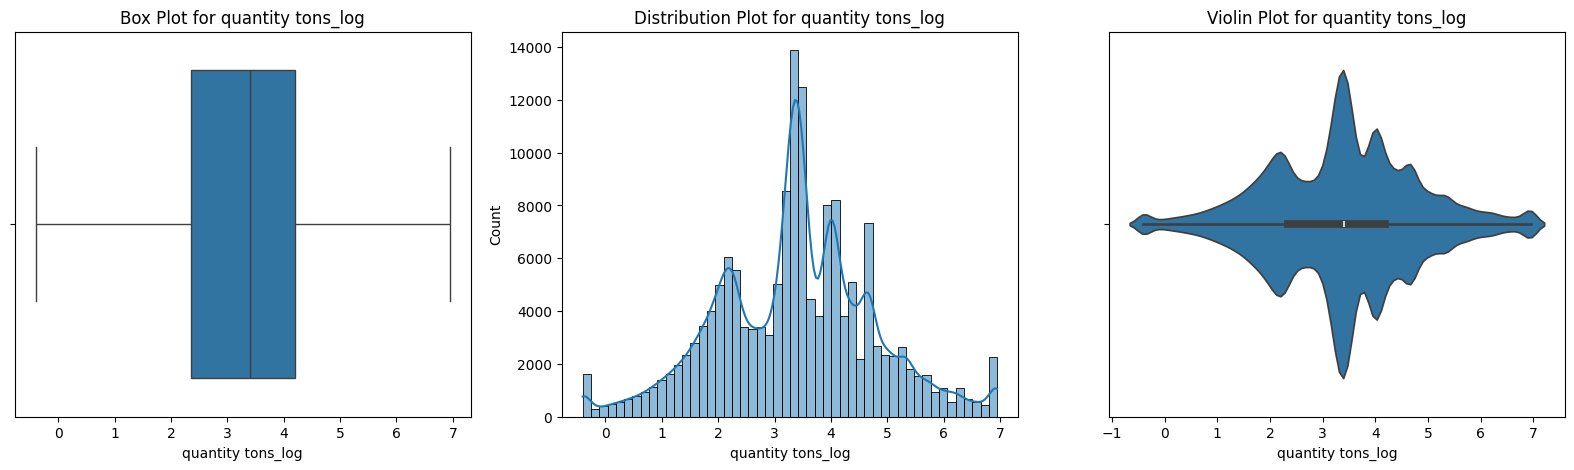

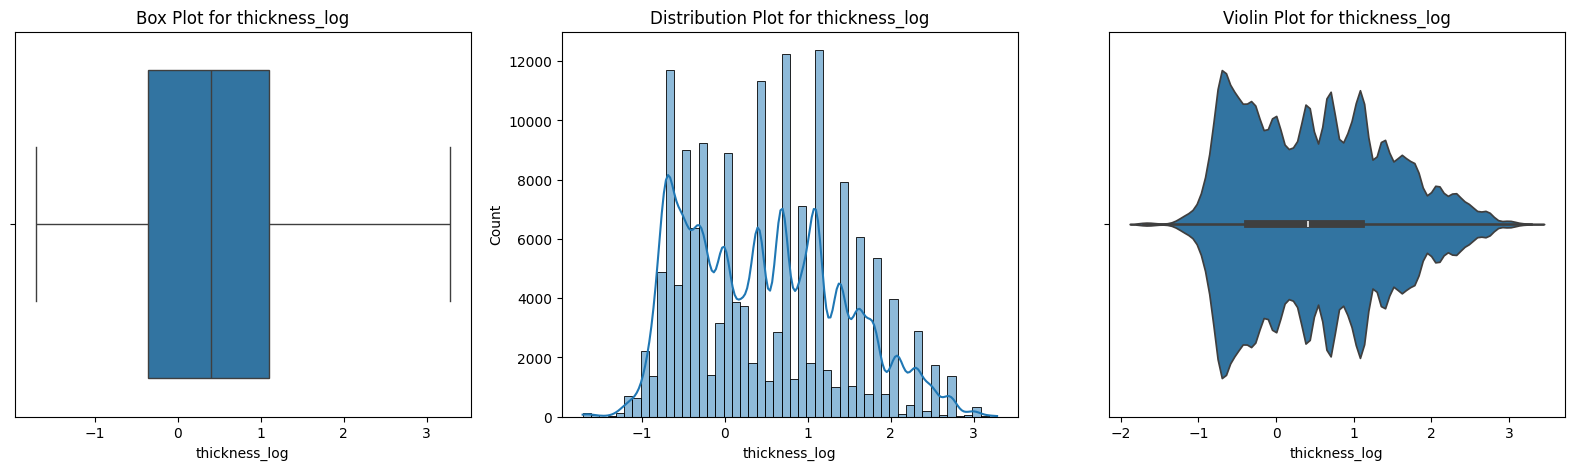

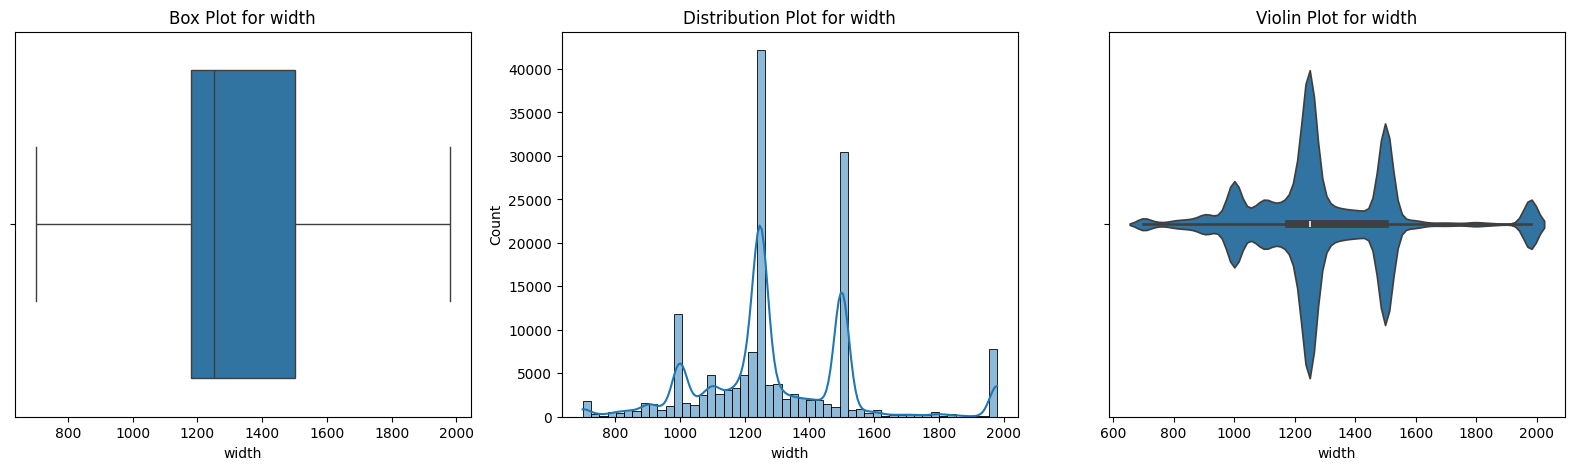

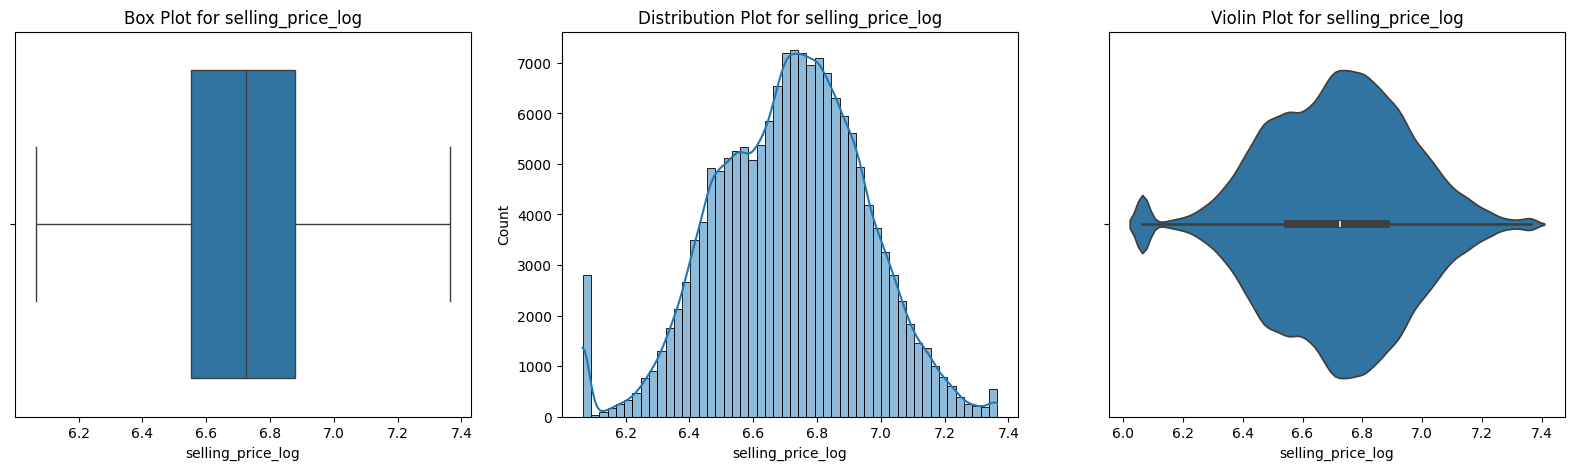

,count,mean,std,min,25%,50%,75%,max
item_date,159474.0,2.020513e+07,4.607859e+03,1.995000e+07,2.020102e+07,2.020121e+07,2.021021e+07,2.021040e+07
quantity tons,159474.0,9.360374e+01,4.286279e+02,1.867763e-03,1.051751e+01,2.994312e+01,6.615319e+01,7.025236e+04
customer,159474.0,3.055052e+07,2.597199e+07,1.245800e+04,3.019688e+07,3.020519e+07,3.028008e+07,2.147484e+09
country,159474.0,4.517301e+01,2.460667e+01,2.500000e+01,2.600000e+01,3.000000e+01,7.800000e+01,1.130000e+02
status,159474.0,1.315751e+00,1.320078e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,8.000000e+00
item type,159474.0,4.159029e+00,1.054900e+00,0.000000e+00,3.000000e+00,5.000000e+00,5.000000e+00,6.000000e+00
application,159474.0,2.560528e+01,1.775245e+01,2.000000e+00,1.000000e+01,1.500000e+01,4.100000e+01,9.900000e+01
thickness,159474.0,2.542671e+00,6.923576e+00,1.800000e-01,7.000000e-01,1.500000e+00,3.000000e+00,2.500000e+03
width,159474.0,1.296971e+03,2.473265e+02,7.000000e+02,1.180000e+03,1.250000e+03,1.500000e+03,1.980000e+03
product_ref,159474.0,4.806684e+08,7.213740e+08,6.404000e+03,6.119930e+05,6.406650e+05,1.665572e+09,1.722208e+09


In [18]:
for i in ['quantity tons_log', 'thickness_log', 'width', 'selling_price_log']:
    plot(df2, i)
df2.describe().T

In [19]:
df3 = df2.drop(columns=['quantity tons', 'thickness', 'selling_price'])
df3.dtypes

,0
item_date,float64
customer,float64
country,float64
status,int64
item type,float64
application,float64
width,float64
product_ref,int64
delivery date,float64
item_date_1,object


In [20]:
col = ['quantity tons_log','customer','country','status','application','width','product_ref','thickness_log','selling_price_log']
df_corelation = df3[col].corr()
df4 = df3.copy()
df_corelation

,quantity tons_log,customer,country,status,application,width,product_ref,thickness_log,selling_price_log
quantity tons_log,1.000000,0.002875,-0.094566,0.017659,0.067169,0.028058,0.074350,0.042530,-0.024380
customer,0.002875,1.000000,-0.007271,0.005163,-0.007322,0.010268,-0.008282,0.020247,-0.028192
country,-0.094566,-0.007271,1.000000,-0.027588,-0.012777,0.052836,-0.149937,-0.069260,-0.020485
status,0.017659,0.005163,-0.027588,1.000000,0.076809,-0.050996,-0.003328,-0.080571,0.033147
application,0.067169,-0.007322,-0.012777,0.076809,1.000000,-0.195099,-0.138049,-0.200907,0.120299
width,0.028058,0.010268,0.052836,-0.050996,-0.195099,1.000000,-0.019698,0.404864,-0.181515
product_ref,0.074350,-0.008282,-0.149937,-0.003328,-0.138049,-0.019698,1.000000,0.240897,-0.073853
thickness_log,0.042530,0.020247,-0.069260,-0.080571,-0.200907,0.404864,0.240897,1.000000,-0.425360
selling_price_log,-0.024380,-0.028192,-0.020485,0.033147,0.120299,-0.181515,-0.073853,-0.425360,1.000000


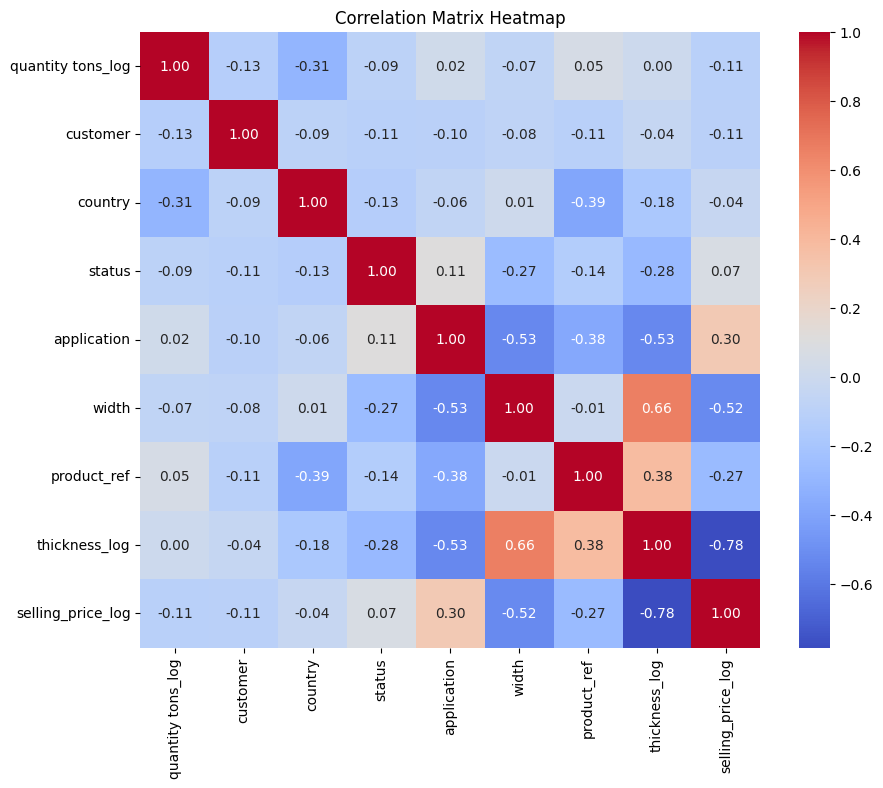

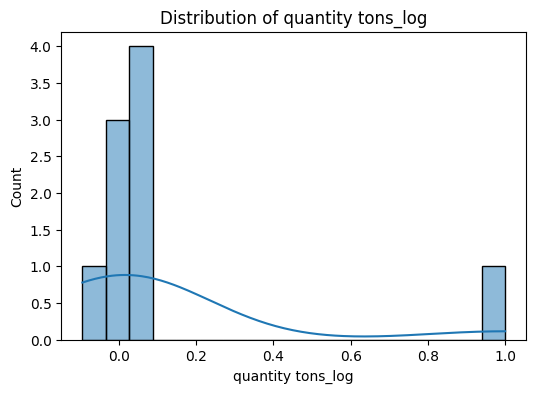

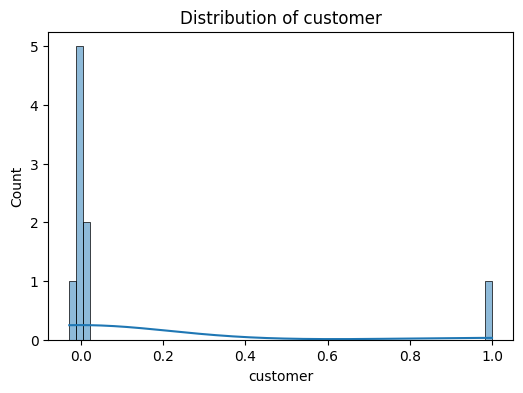

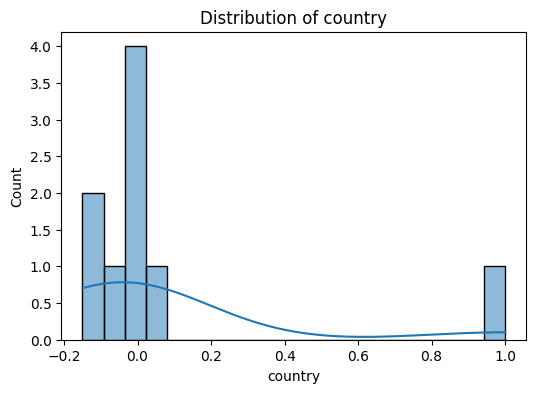

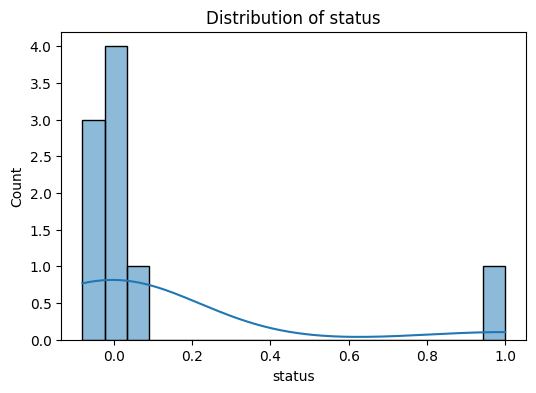

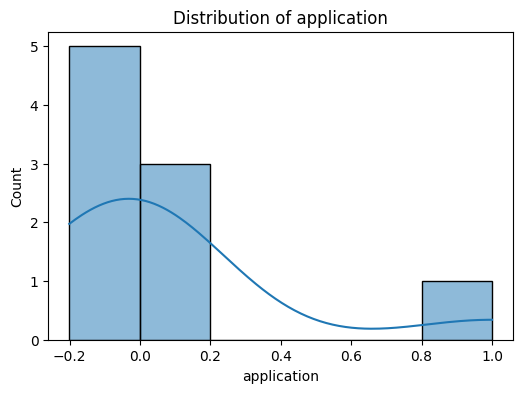

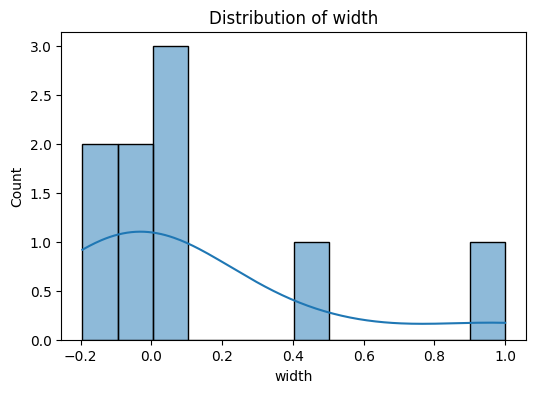

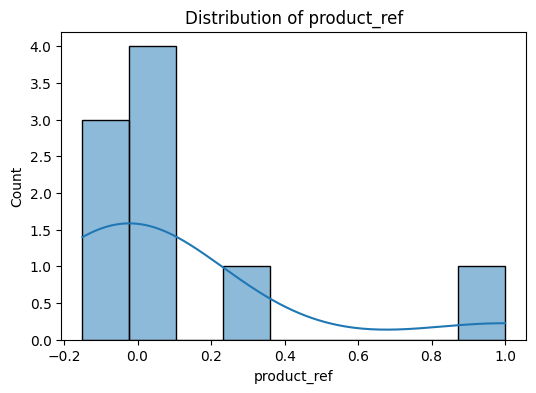

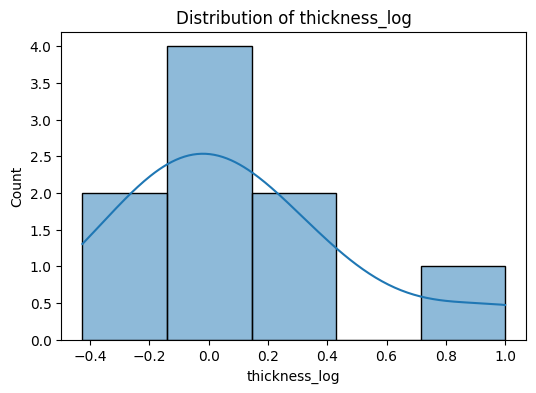

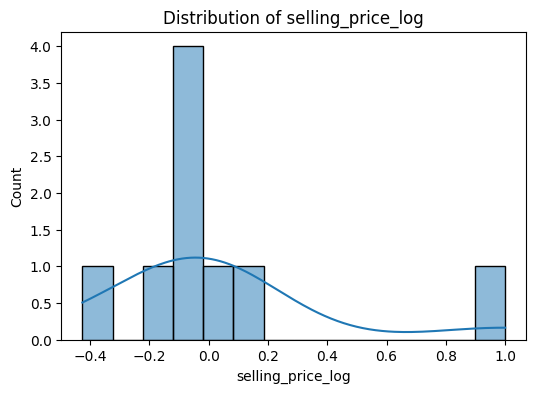

<Figure size 600x400 with 0 Axes>

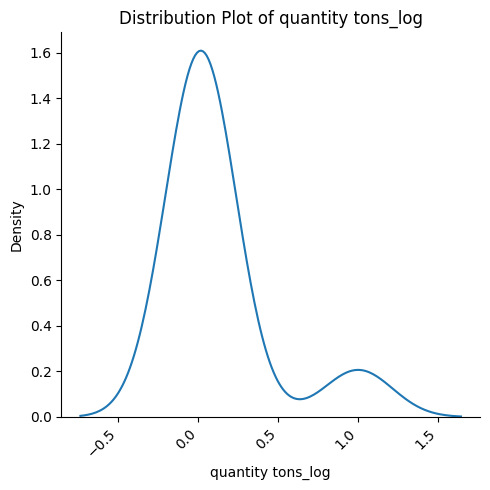

<Figure size 600x400 with 0 Axes>

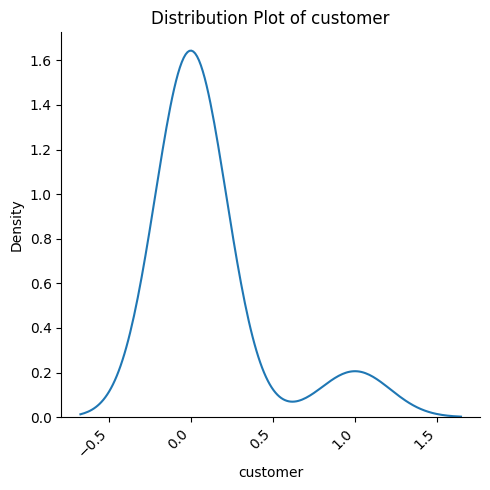

<Figure size 600x400 with 0 Axes>

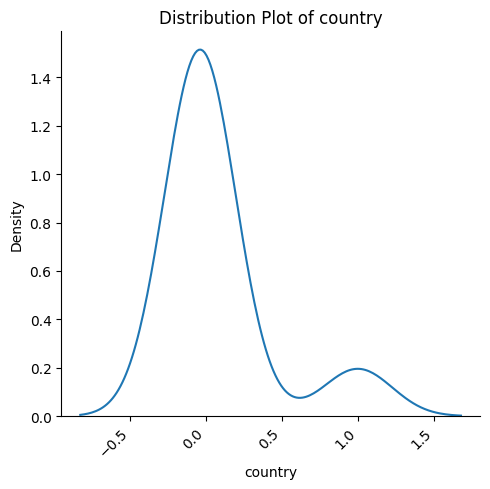

<Figure size 600x400 with 0 Axes>

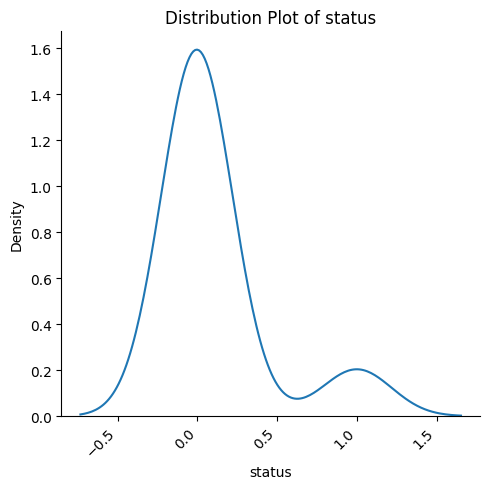

<Figure size 600x400 with 0 Axes>

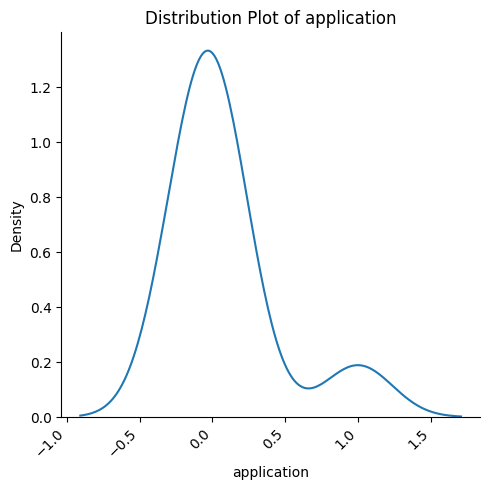

<Figure size 600x400 with 0 Axes>

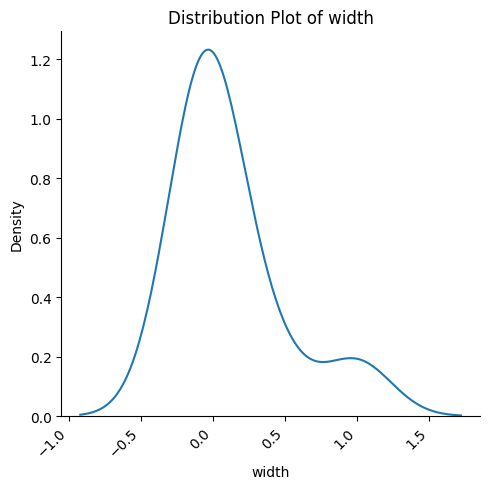

<Figure size 600x400 with 0 Axes>

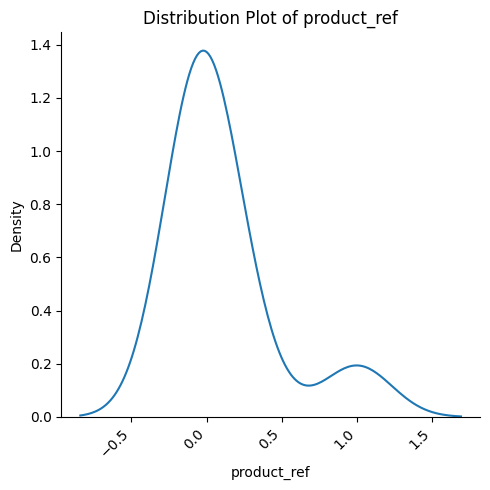

<Figure size 600x400 with 0 Axes>

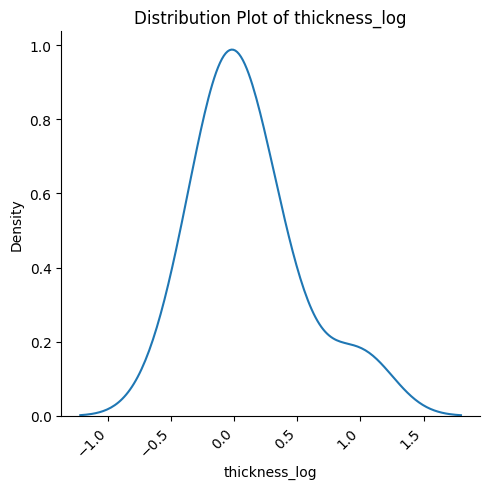

<Figure size 600x400 with 0 Axes>

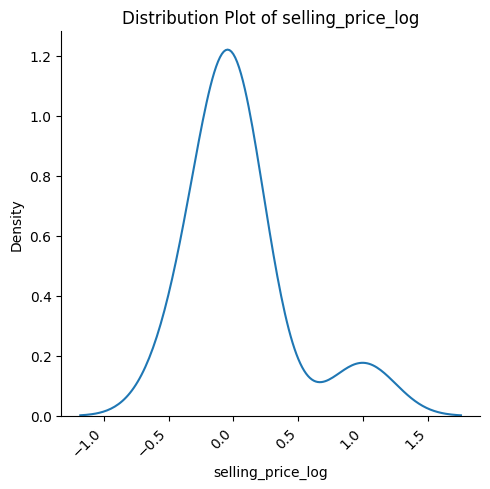

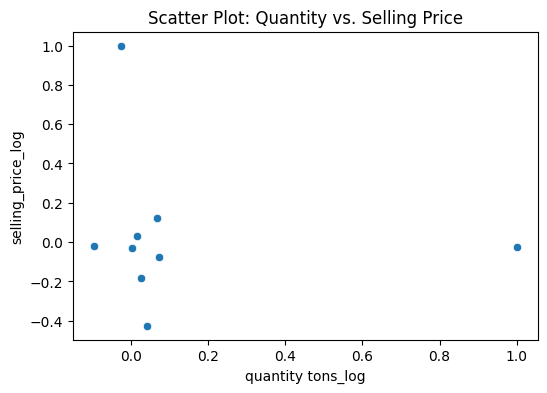

In [21]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_corelation.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

for column in df_corelation.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df_corelation[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

for column in df_corelation.columns:
    plt.figure(figsize=(6, 4))
    sns.displot(x=column, data=df_corelation, kind='kde')

    plt.title(f'Distribution Plot of {column}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

plt.figure(figsize=(6, 4))
sns.scatterplot(x='quantity tons_log', y='selling_price_log', data=df_corelation)
plt.title('Scatter Plot: Quantity vs. Selling Price')
plt.show()

In [22]:
df4['Date_difference'] = (df4['delivery date_1'] - df4['item_date_1']).apply(lambda x: x.days)
df4.head()

,item_date,customer,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery date_1,quantity tons_log,thickness_log,selling_price_log,Date_difference
0,20210401.0,30156308.0,28.0,1,5.0,10.0,1500.0,1670798778,20210701.0,2021-04-01,2021-07-01,3.991779,0.693147,6.749931,91
1,20210401.0,30202938.0,25.0,1,5.0,41.0,1210.0,1668701718,20210401.0,2021-04-01,2021-04-01,6.643822,-0.223144,6.953684,0
2,20210401.0,30153963.0,30.0,1,6.0,28.0,952.0,628377,20210101.0,2021-04-01,2021-01-01,5.956169,-0.967584,6.468211,-90
3,20210401.0,30349574.0,32.0,1,3.0,59.0,1317.0,1668701718,20210101.0,2021-04-01,2021-01-01,5.310301,0.832909,6.643790,-90
4,20210401.0,30211560.0,28.0,1,5.0,10.0,1980.0,640665,20210301.0,2021-04-01,2021-03-01,6.666354,1.386294,6.357842,-31


In [23]:
df4['item_date_1'] = pd.to_datetime(df4['item_date_1'])
df4['item_date_day'] = df4['item_date_1'].dt.day
df4['item_date_month'] = df4['item_date_1'].dt.month
df4['item_date_year'] = df4['item_date_1'].dt.year

In [24]:
df_f1 = df4[df4['Date_difference']>=0]
df_f1 = df_f1.reset_index(drop=True)
df_f2 = df4[df4['Date_difference']<0]
df_f2 = df_f2.reset_index(drop=True)


In [25]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
df_f1.columns

Index(['item_date', 'customer', 'country', 'status', 'item type',
       'application', 'width', 'product_ref', 'delivery date', 'item_date_1',
       'delivery date_1', 'quantity tons_log', 'thickness_log',
       'selling_price_log', 'Date_difference', 'item_date_day',
       'item_date_month', 'item_date_year'],
      dtype='object')

In [26]:
def machine_learning_delivery_date(df, algorithm):

    x = df.drop(columns=['item_date_1', 'delivery date_1', 'Date_difference'], axis=1)
    y = df['Date_difference']

    from sklearn.impute import SimpleImputer
    imputer = SimpleImputer(strategy='median')
    x = imputer.fit_transform(x)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

    model = algorithm().fit(x_train, y_train)
    y_pred = model.predict(x_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    metrics = {'Algorithm': str(algorithm).split("'")[1].split(".")[-1],
               'R2': r2,
               'Mean Absolute Error': mae,
               'Mean Squared Error': mse,
               'Root Mean Squared Error': rmse}

    return metrics

In [27]:
print(machine_learning_delivery_date(df_f1, DecisionTreeRegressor))
print(machine_learning_delivery_date(df_f1, RandomForestRegressor))
print(machine_learning_delivery_date(df_f1, AdaBoostRegressor))
print(machine_learning_delivery_date(df_f1, XGBRegressor))

{'Algorithm': 'DecisionTreeRegressor', 'R2': 0.9999361999910418, 'Mean Absolute Error': 0.004034947312258236, 'Mean Squared Error': 0.10007336267840469, 'Root Mean Squared Error': np.float64(0.31634374132959336)}
{'Algorithm': 'RandomForestRegressor', 'R2': 0.9969390359851024, 'Mean Absolute Error': 0.018953581432573034, 'Mean Squared Error': 4.849615819661197, 'Root Mean Squared Error': np.float64(2.202184329174376)}
{'Algorithm': 'AdaBoostRegressor', 'R2': 0.7855108894431561, 'Mean Absolute Error': 15.504541190454805, 'Mean Squared Error': 344.83081953562396, 'Root Mean Squared Error': np.float64(18.569620877541468)}
{'Algorithm': 'XGBRegressor', 'R2': 0.9990721940994263, 'Mean Absolute Error': 0.1635901927947998, 'Mean Squared Error': 1.4635701179504395, 'Root Mean Squared Error': np.float64(1.2097810206605324)}


In [28]:
def machine_learning_delivery_date(df, algorithm):
  model = RandomForestRegressor().fit(
      df_f1.drop(columns=['item_date_1', 'delivery date_1', 'Date_difference'], axis=1),
      df_f1['Date_difference']
  )
  return model

model = machine_learning_delivery_date(df_f1, RandomForestRegressor)

user_data = np.array([[30153963, 30, 6, 28, 952, 628377, 5.9, -0.96, 6.46, 1, 4, 2021, 1, 1, 2021]])
y_p = model.predict(user_data)
if y_p[0] == 1:
    print('Won')
else:
    print('Lose')

Lose
